# Toy baseline model : multi-symbol

Preliminary trial with multiple symbols. Implement reuseable functionalities at the same time.

In [ ]:
from pathlib import Path
import datetime

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tqdm

from sklearn.metrics import r2_score

from artool import ar_io, toy

# remove limits on number of rows and columns
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)


## Settings

In [ ]:
rdm_seed = 42
max_workers = 36

data_dir = Path("/home/yangzhe/data/toy_data_2")


In [ ]:
date_start = datetime.datetime(2022, 3, 1)
date_end = datetime.datetime(2022, 9, 1)
symbols = toy.toy_data.get_symbol_list(date_start, date_end)


In [ ]:
target_symbols = ["BTCUSDT", "ETHUSDT", "DOGEUSDT", "BNBUSDT", "ADAUSDT"]
print(f"target_symbols: {target_symbols}")


target_symbols: ['BTCUSDT', 'ETHUSDT', 'DOGEUSDT', 'BNBUSDT', 'ADAUSDT']


## Visualize one symbol

In [ ]:
symbol = "BTCUSDT"
df = pd.read_feather(data_dir / f"{symbol}.feather")
df.head()


,symbol,funding_timestamp,funding_rate,index_price,mark_price,funding_rate_expcumsum_0.5,funding_rate_expcumsum_1,funding_rate_expcumsum_2,funding_rate_expcumsum_3,funding_rate_expcumsum_5,funding_rate_expcumsum_10,funding_rate_expcumsum_20,funding_rate_expcumsum_50,funding_rate_rol_mean_3,funding_rate_rol_std_3,funding_rate_rol_max_3,funding_rate_rol_min_3,funding_rate_rol_skew_3,funding_rate_rol_mean_5,funding_rate_rol_std_5,funding_rate_rol_max_5,funding_rate_rol_min_5,funding_rate_rol_skew_5,funding_rate_rol_kurt_5,funding_rate_rol_mean_10,funding_rate_rol_std_10,funding_rate_rol_max_10,funding_rate_rol_min_10,funding_rate_rol_skew_10,funding_rate_rol_kurt_10,funding_rate_rol_mean_20,funding_rate_rol_std_20,funding_rate_rol_max_20,funding_rate_rol_min_20,funding_rate_rol_skew_20,funding_rate_rol_kurt_20,funding_rate_rol_mean_50,funding_rate_rol_std_50,funding_rate_rol_max_50,funding_rate_rol_min_50,funding_rate_rol_skew_50,funding_rate_rol_kurt_50,funding_rate_future_1,funding_rate_future_2,funding_rate_future_3,funding_rate_future_5,funding_rate_future_10,index_price_expcumsum_0.5,index_price_expcumsum_1,index_price_expcumsum_2,index_price_expcumsum_3,index_price_expcumsum_5,index_price_expcumsum_10,index_price_expcumsum_20,index_price_expcumsum_50,index_price_rol_mean_3,index_price_rol_std_3,index_price_rol_max_3,index_price_rol_min_3,index_price_rol_skew_3,index_price_rol_mean_5,index_price_rol_std_5,index_price_rol_max_5,index_price_rol_min_5,index_price_rol_skew_5,index_price_rol_kurt_5,index_price_rol_mean_10,index_price_rol_std_10,index_price_rol_max_10,index_price_rol_min_10,index_price_rol_skew_10,index_price_rol_kurt_10,index_price_rol_mean_20,index_price_rol_std_20,index_price_rol_max_20,index_price_rol_min_20,index_price_rol_skew_20,index_price_rol_kurt_20,index_price_rol_mean_50,index_price_rol_std_50,index_price_rol_max_50,index_price_rol_min_50,index_price_rol_skew_50,index_price_rol_kurt_50,mark_price_expcumsum_0.5,mark_price_expcumsum_1,mark_price_expcumsum_2,mark_price_expcumsum_3,mark_price_expcumsum_5,mark_price_expcumsum_10,mark_price_expcumsum_20,mark_price_expcumsum_50,mark_price_rol_mean_3,mark_price_rol_std_3,mark_price_rol_max_3,mark_price_rol_min_3,mark_price_rol_skew_3,mark_price_rol_mean_5,mark_price_rol_std_5,mark_price_rol_max_5,mark_price_rol_min_5,mark_price_rol_skew_5,mark_price_rol_kurt_5,mark_price_rol_mean_10,mark_price_rol_std_10,mark_price_rol_max_10,mark_price_rol_min_10,mark_price_rol_skew_10,mark_price_rol_kurt_10,mark_price_rol_mean_20,mark_price_rol_std_20,mark_price_rol_max_20,mark_price_rol_min_20,mark_price_rol_skew_20,mark_price_rol_kurt_20,mark_price_rol_mean_50,mark_price_rol_std_50,mark_price_rol_max_50,mark_price_rol_min_50,mark_price_rol_skew_50,mark_price_rol_kurt_50
0,BTCUSDT,1.641024e+15,0.0001,46216.330981,46216.691231,0.000014,0.000037,0.000061,0.000072,0.000082,0.000090,0.000095,0.000098,0.0001,NaN,0.0001,0.0001,NaN,0.0001,NaN,0.0001,0.0001,NaN,NaN,0.0001,NaN,0.0001,0.0001,NaN,NaN,0.0001,NaN,0.0001,0.0001,NaN,NaN,0.0001,NaN,0.0001,0.0001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6254.700243,17002.038014,28031.621720,33115.448208,37838.731469,41818.265596,43962.333922,45301.186313,46216.330981,NaN,46216.330981,46216.330981,NaN,46216.330981,NaN,46216.330981,46216.330981,NaN,NaN,46216.330981,NaN,46216.330981,46216.330981,NaN,NaN,46216.330981,NaN,46216.330981,46216.330981,NaN,NaN,46216.330981,NaN,46216.330981,46216.330981,NaN,NaN,6254.748998,17002.170543,28031.840222,33115.706338,37839.026416,41818.591563,43962.676602,45301.539429,46216.691231,NaN,46216.691231,46216.691231,NaN,46216.691231,NaN,46216.691231,46216.691231,NaN,NaN,46216.691231,NaN,46216.691231,46216.691231,NaN,NaN,46216.691231,NaN,46216.691231,46216.691231,NaN,NaN,46216.691231,NaN,46216.691231,46216.691231,NaN,NaN
1,BTCUSDT,1.641053e+15,0.0001,47202.990648,47190.685043,0.000015,0.000050,0.000097,0.000123,0.000149,0.000172,0.000186,0.000194,0.0001,0.0,0.0001,0.0001,NaN,0.0001,0.0,0.0001,0.0001,NaN,NaN,0.0001,0.0,0.0001,0

In [ ]:
df.describe()


,funding_timestamp,funding_rate,index_price,mark_price,funding_rate_expcumsum_0.5,funding_rate_expcumsum_1,funding_rate_expcumsum_2,funding_rate_expcumsum_3,funding_rate_expcumsum_5,funding_rate_expcumsum_10,funding_rate_expcumsum_20,funding_rate_expcumsum_50,funding_rate_rol_mean_3,funding_rate_rol_std_3,funding_rate_rol_max_3,funding_rate_rol_min_3,funding_rate_rol_skew_3,funding_rate_rol_mean_5,funding_rate_rol_std_5,funding_rate_rol_max_5,funding_rate_rol_min_5,funding_rate_rol_skew_5,funding_rate_rol_kurt_5,funding_rate_rol_mean_10,funding_rate_rol_std_10,funding_rate_rol_max_10,funding_rate_rol_min_10,funding_rate_rol_skew_10,funding_rate_rol_kurt_10,funding_rate_rol_mean_20,funding_rate_rol_std_20,funding_rate_rol_max_20,funding_rate_rol_min_20,funding_rate_rol_skew_20,funding_rate_rol_kurt_20,funding_rate_rol_mean_50,funding_rate_rol_std_50,funding_rate_rol_max_50,funding_rate_rol_min_50,funding_rate_rol_skew_50,funding_rate_rol_kurt_50,funding_rate_future_1,funding_rate_future_2,funding_rate_future_3,funding_rate_future_5,funding_rate_future_10,index_price_expcumsum_0.5,index_price_expcumsum_1,index_price_expcumsum_2,index_price_expcumsum_3,index_price_expcumsum_5,index_price_expcumsum_10,index_price_expcumsum_20,index_price_expcumsum_50,index_price_rol_mean_3,index_price_rol_std_3,index_price_rol_max_3,index_price_rol_min_3,index_price_rol_skew_3,index_price_rol_mean_5,index_price_rol_std_5,index_price_rol_max_5,index_price_rol_min_5,index_price_rol_skew_5,index_price_rol_kurt_5,index_price_rol_mean_10,index_price_rol_std_10,index_price_rol_max_10,index_price_rol_min_10,index_price_rol_skew_10,index_price_rol_kurt_10,index_price_rol_mean_20,index_price_rol_std_20,index_price_rol_max_20,index_price_rol_min_20,index_price_rol_skew_20,index_price_rol_kurt_20,index_price_rol_mean_50,index_price_rol_std_50,index_price_rol_max_50,index_price_rol_min_50,index_price_rol_skew_50,index_price_rol_kurt_50,mark_price_expcumsum_0.5,mark_price_expcumsum_1,mark_price_expcumsum_2,mark_price_expcumsum_3,mark_price_expcumsum_5,mark_price_expcumsum_10,mark_price_expcumsum_20,mark_price_expcumsum_50,mark_price_rol_mean_3,mark_price_rol_std_3,mark_price_rol_max_3,mark_price_rol_min_3,mark_price_rol_skew_3,mark_price_rol_mean_5,mark_price_rol_std_5,mark_price_rol_max_5,mark_price_rol_min_5,mark_price_rol_skew_5,mark_price_rol_kurt_5,mark_price_rol_mean_10,mark_price_rol_std_10,mark_price_rol_max_10,mark_price_rol_min_10,mark_price_rol_skew_10,mark_price_rol_kurt_10,mark_price_rol_mean_20,mark_price_rol_std_20,mark_price_rol_max_20,mark_price_rol_min_20,mark_price_rol_skew_20,mark_price_rol_kurt_20,mark_price_rol_mean_50,mark_price_rol_std_50,mark_price_rol_max_50,mark_price_rol_min_50,mark_price_rol_skew_50,mark_price_rol_kurt_50
count,7.320000e+02,732.000000,732.000000,732.000000,7.320000e+02,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,731.000000,732.000000,732.000000,593.000000,732.000000,731.000000,732.000000,732.000000,649.000000,649.000000,732.000000,731.000000,732.000000,732.000000,695.000000,695.000000,732.000000,731.000000,732.000000,732.000000,704.000000,704.000000,732.000000,731.000000,7.320000e+02,732.000000,704.000000,704.000000,731.000000,730.000000,729.000000,727.000000,722.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,7.320000e+02,732.000000,731.000000,732.000000,732.000000,730.000000,732.000000,731.000000,732.000000,732.000000,730.000000,729.000000,732.000000,731.000000,732.000000,732.000000,730.000000,729.000000,732.000000,731.000000,732.000000,732.000000,730.000000,729.000000,732.000000,731.000000,732.000000,732.000000,730.000000,729.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,7.320000e+02,732.000000,731.000000,732.000000,732.000000,730.000000,732.000000,731.000000,732.000000,732.000000,730.000000,729.000000,732.000000,731.000000,732.000000,732.000000,730.000000,729.000000,732.000000,731.000000,732.000

In [ ]:
# Use columns from `features`
features = df.columns.tolist()
# remove features start with fundint_rate_future
features = [x for x in features if not x.startswith("funding_rate_future")]


In [ ]:
x_features = features[2:]

x_corr = df[x_features].corr()
x_selected = set(x_features)
x_selected.remove("funding_rate_rol_max_50")
# remove features with correlation > 0.5
for i in range(len(x_corr)):
    for j in range(i + 1, len(x_corr)):
        if abs(x_corr.iloc[i, j]) > 0.5:
            fe_rm_1 = x_corr.columns[i]
            fe_rm_2 = x_corr.columns[j]
            if fe_rm_1 in x_selected and fe_rm_2 in x_selected:
                try:
                    t1 = float(fe_rm_1.split("_")[-1])
                except:
                    t1 = 0
                try:
                    t2 = float(fe_rm_2.split("_")[-1])
                except:
                    t2 = 0
                if t1 < t2:
                    print(f"Removing {fe_rm_1}")
                    x_selected.remove(fe_rm_1)
                else:
                    print(f"Removing {fe_rm_2}")
                    x_selected.remove(fe_rm_2)
x_selected = sorted(list(x_selected))
print(x_selected)


Removing funding_rate
Removing mark_price
Removing index_price
Removing funding_rate_expcumsum_0.5
Removing funding_rate_expcumsum_1
Removing funding_rate_expcumsum_2
Removing funding_rate_expcumsum_3
Removing funding_rate_expcumsum_5
Removing funding_rate_expcumsum_10
Removing funding_rate_expcumsum_20
Removing funding_rate_rol_mean_5
Removing funding_rate_rol_mean_10
Removing funding_rate_rol_mean_20
Removing funding_rate_rol_std_20
Removing funding_rate_rol_skew_20
Removing funding_rate_rol_mean_50
Removing funding_rate_rol_std_50
Removing funding_rate_rol_min_50
Removing index_price_expcumsum_0.5
Removing index_price_expcumsum_1
Removing index_price_expcumsum_2
Removing index_price_expcumsum_3
Removing index_price_expcumsum_5
Removing index_price_expcumsum_10
Removing index_price_rol_mean_3
Removing index_price_rol_max_3
Removing index_price_rol_min_3
Removing index_price_rol_mean_5
Removing index_price_rol_max_5
Removing index_price_rol_min_5
Removing index_price_rol_mean_10
Remov

<AxesSubplot:>

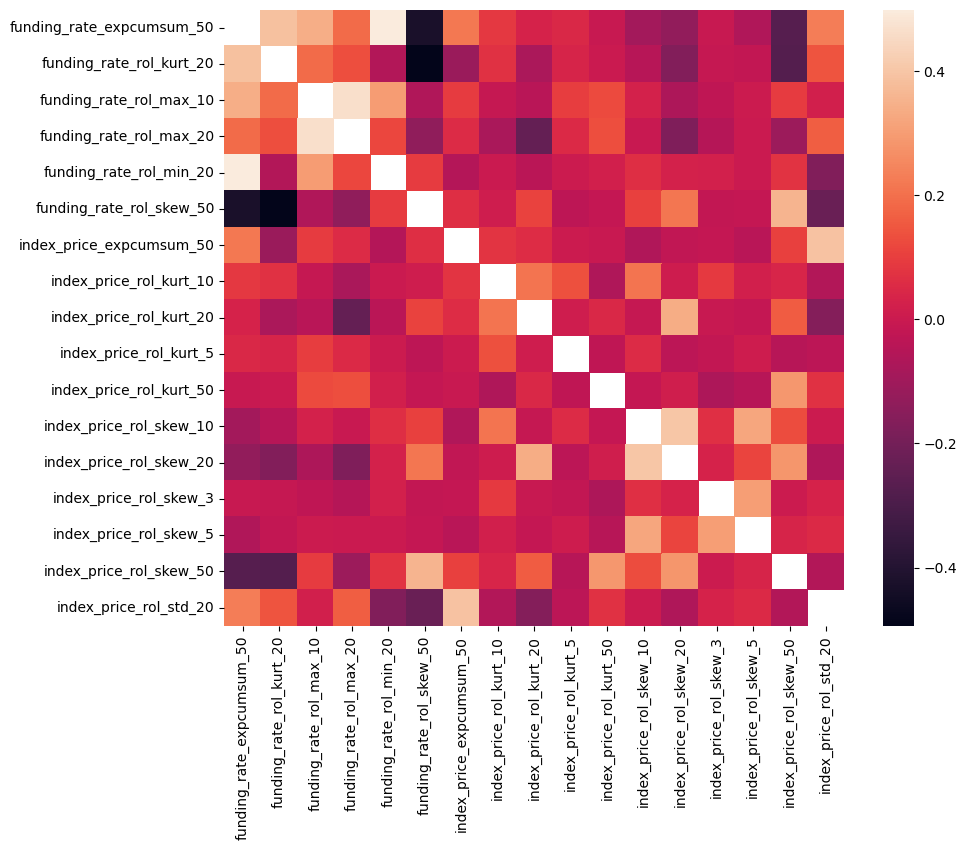

In [ ]:
df_x = df[list(x_selected)]
fig, ax = plt.subplots(figsize=(10, 8))
cur_corr = df_x.corr()
# set diagonal to Nan
for i in range(len(cur_corr)):
    cur_corr.iloc[i, i] = np.nan
sns.heatmap(cur_corr, ax=ax)


In [ ]:
df_x.describe()


,funding_rate_expcumsum_50,funding_rate_rol_kurt_20,funding_rate_rol_max_10,funding_rate_rol_max_20,funding_rate_rol_min_20,funding_rate_rol_skew_50,index_price_expcumsum_50,index_price_rol_kurt_10,index_price_rol_kurt_20,index_price_rol_kurt_5,index_price_rol_kurt_50,index_price_rol_skew_10,index_price_rol_skew_20,index_price_rol_skew_3,index_price_rol_skew_5,index_price_rol_skew_50,index_price_rol_std_20
count,732.000000,711.000000,732.000000,732.000000,732.000000,730.000000,732.000000,729.000000,729.000000,729.000000,729.000000,730.000000,730.000000,730.000000,730.000000,730.000000,731.000000
mean,-0.000547,1.849982,0.000080,0.000096,-0.000236,-1.444644,37.003449,-0.132097,-0.219068,-0.139012,-0.347063,0.094541,0.167179,-0.081765,-0.040647,0.176109,0.039061
std,0.002098,4.144791,0.000045,0.000017,0.000241,1.086502,11.609483,1.487554,1.339468,2.098742,1.063584,0.804907,0.683543,1.224626,0.933693,0.675442,0.028682
min,-0.004475,-1.850947,-0.000126,-0.000056,-0.001377,-4.383867,1.282227,-2.234171,-2.012146,-3.313176,-1.742441,-2.023133,-1.848407,-1.732024,-2.167985,-1.634245,0.006097
25%,-0.002367,-0.780070,0.000100,0.000100,-0.000321,-2.186160,25.303786,-1.203231,-1.064660,-1.973966,-1.061626,-0.467479,-0.235301,-1.264327,-0.645302,-0.284758,0.020123
50%,-0.000418,0.422302,0.000100,0.000100,-0.000209,-1.181912,37.117964,-0.500610,-0.544315,-0.419273,-0.611761,0.115704,0.118651,-0.130941,-0.057933,0.207453,0.030689
75%,0.001360,2.597900,0.000100,0.000100,-0.000111,-0.570398,48.464542,0.491326,0.198257,1.432105,0.104151,0.641386,0.557573,1.156276,0.553072,0.587841,0.050951
max,0.002915,20.000000,0.000100,0.000100,0.000100,0.121558,52.654935,7.048976,9.707543,4.877118,8.518883,2.540465,2.709450,1.731998,2.200084,2.620312,0.180994


Check other symbols

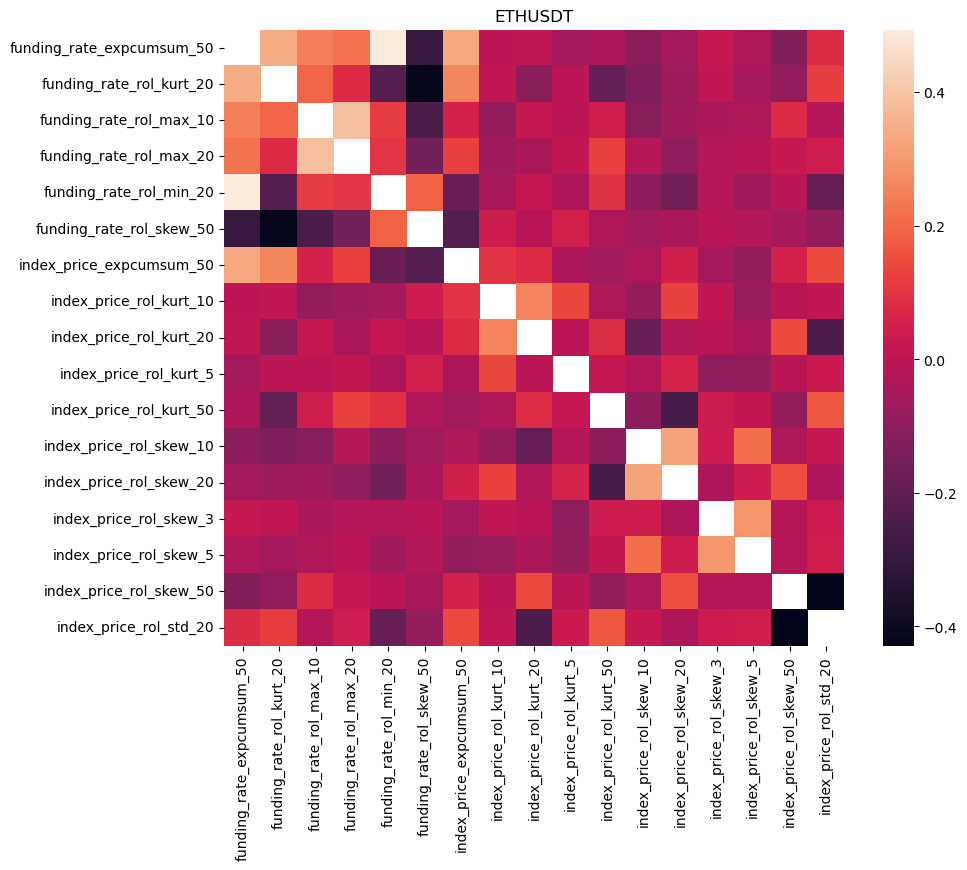

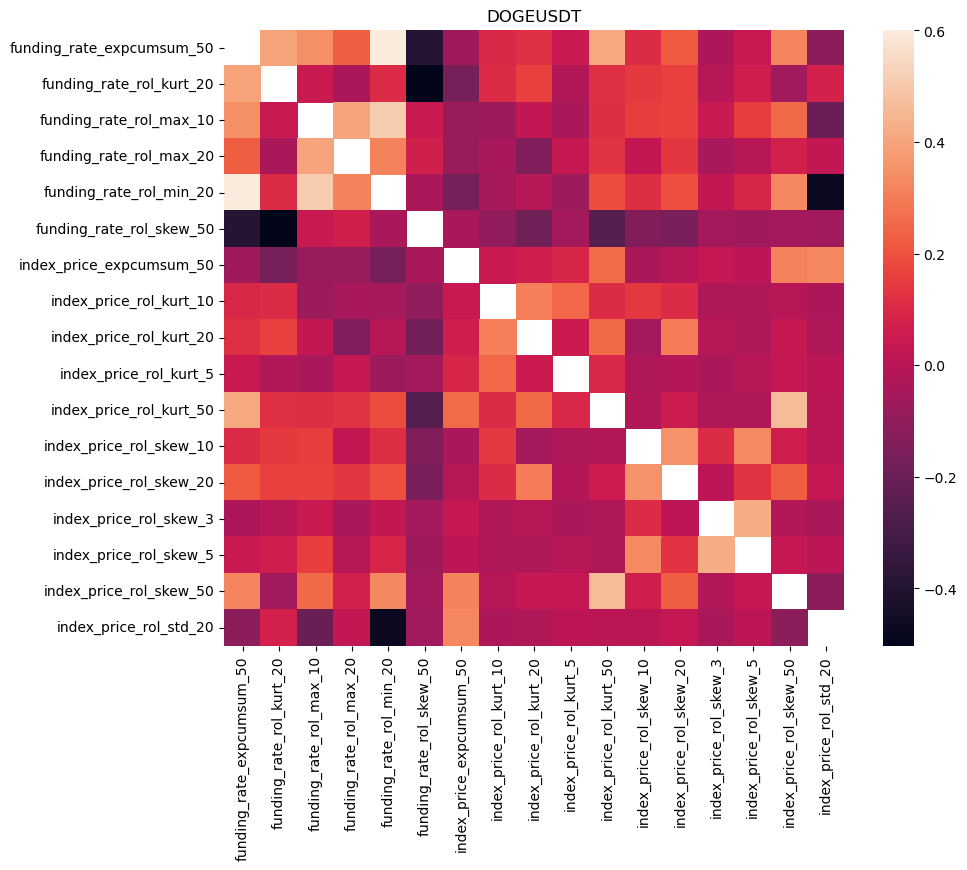

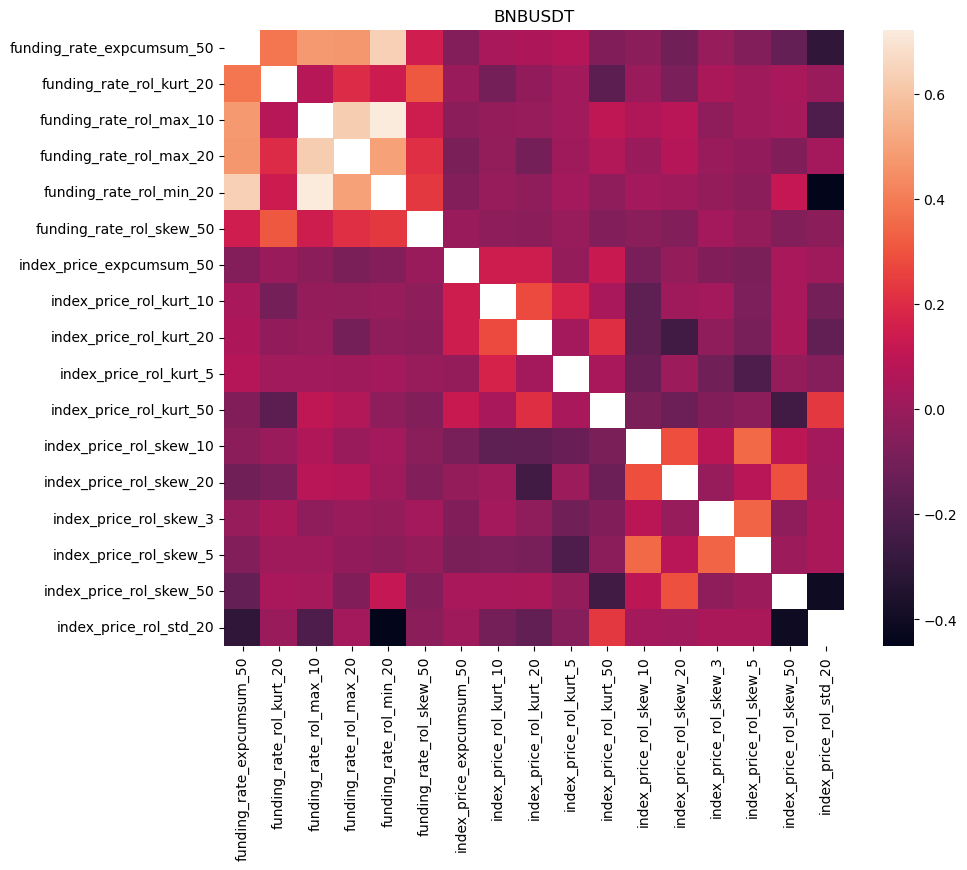

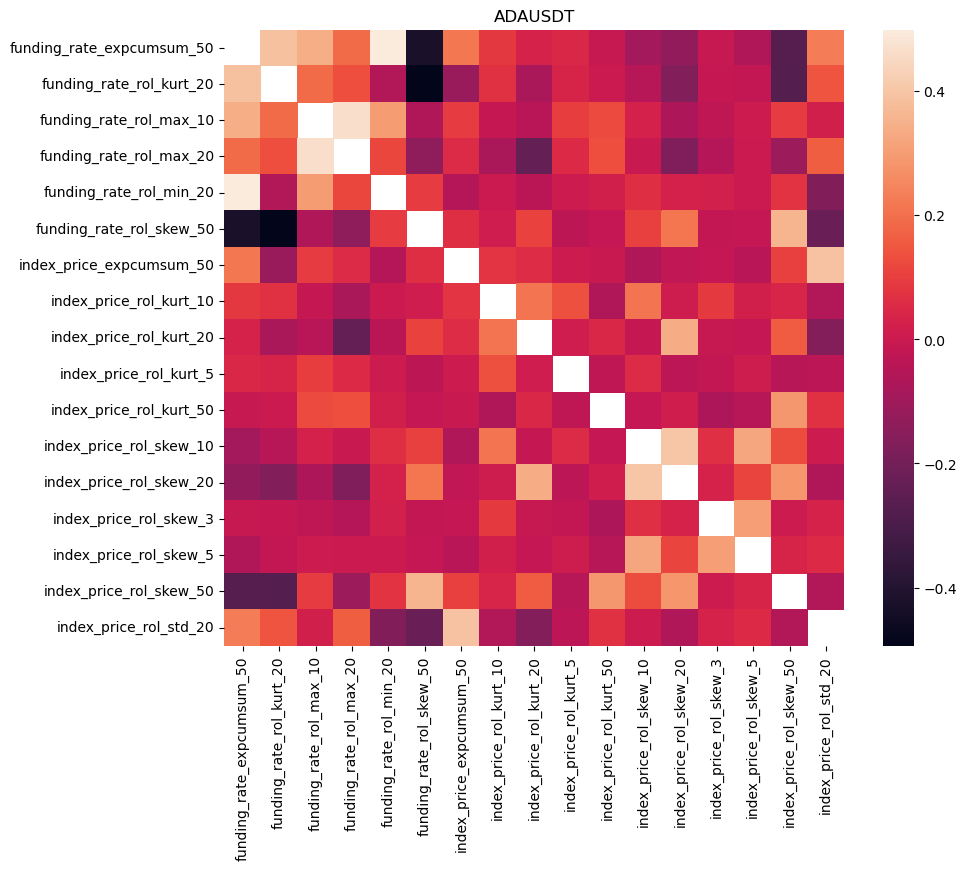

In [ ]:
# remove_features = ["funding_rate_rol_std_50"]
remove_features = [
    "funding_rate_rol_std_50",
    "index_price_rol_std_3",
    "funding_rate_rol_std_5",
    "funding_rate_rol_max_10",
]
remove_features = []
x_selected = [x for x in x_selected if x not in remove_features]

for symbol in target_symbols[1:]:
    df = pd.read_feather(data_dir / f"{symbol}.feather")
    df_x = df[list(x_selected)]
    fig, ax = plt.subplots(figsize=(10, 8))
    cur_corr = df_x.corr()
    # set diagonal to Nan
    for i in range(len(cur_corr)):
        cur_corr.iloc[i, i] = np.nan
    sns.heatmap(cur_corr, ax=ax)
    ax.set_title(symbol)


## Input Processing

In [ ]:
from sklearn.preprocessing import StandardScaler

targets = [x for x in df.columns if x.startswith("funding_rate_future")]
print(targets)

df_y_dict = {}
df_y_sc_dict = {}
for symbol in target_symbols:
    df = pd.read_feather(data_dir / f"{symbol}.feather")
    df_y_dict[symbol] = df[targets]
    df_y = df[targets]
    df_y_sc = pd.DataFrame(scaler.fit_transform(df_y), columns=df_y.columns)
    df_y_sc_dict[symbol] = df_y_sc


['funding_rate_future_1', 'funding_rate_future_2', 'funding_rate_future_3', 'funding_rate_future_5', 'funding_rate_future_10']


In [ ]:
df_x_sc_dict = {}
for symbol in target_symbols:
    df = pd.read_feather(data_dir / f"{symbol}.feather")
    df_x = df[list(x_selected)]
    df_x_sc = pd.DataFrame(scaler.fit_transform(df_x), columns=df_x.columns)
    df_x_sc_dict[symbol] = df_x_sc


In [ ]:
df_x_sc.describe()


,funding_rate_expcumsum_50,funding_rate_rol_kurt_20,funding_rate_rol_max_10,funding_rate_rol_max_20,funding_rate_rol_min_20,funding_rate_rol_skew_50,index_price_expcumsum_50,index_price_rol_kurt_10,index_price_rol_kurt_20,index_price_rol_kurt_5,index_price_rol_kurt_50,index_price_rol_skew_10,index_price_rol_skew_20,index_price_rol_skew_3,index_price_rol_skew_5,index_price_rol_skew_50,index_price_rol_std_20
count,7.320000e+02,7.110000e+02,7.320000e+02,7.320000e+02,7.320000e+02,7.300000e+02,7.320000e+02,7.290000e+02,7.290000e+02,7.290000e+02,7.290000e+02,7.300000e+02,7.300000e+02,7.300000e+02,7.300000e+02,7.300000e+02,7.310000e+02
mean,1.236109e-16,-4.020850e-17,-6.664372e-16,-1.266746e-15,7.371153e-17,-5.383821e-17,5.111273e-16,-1.720922e-17,2.497621e-17,1.522940e-17,-3.776890e-17,1.870650e-17,1.885858e-17,2.129195e-17,-2.889622e-17,-4.745063e-17,-7.305298e-17
std,1.000684e+00,1.000704e+00,1.000684e+00,1.000684e+00,1.000684e+00,1.000686e+00,1.000684e+00,1.000687e+00,1.000687e+00,1.000687e+00,1.000687e+00,1.000686e+00,1.000686e+00,1.000686e+00,1.000686e+00,1.000686e+00,1.000685e+00
min,-1.873250e+00,-8.935394e-01,-4.635689e+00,-9.026323e+00,-4.728666e+00,-2.707070e+00,-3.079004e+00,-1.414079e+00,-1.339568e+00,-1.513451e+00,-1.312860e+00,-2.632758e+00,-2.950756e+00,-1.348485e+00,-2.279973e+00,-2.682088e+00,-1.150093e+00
25%,-8.676608e-01,-6.349906e-01,4.388299e-01,2.531314e-01,-3.493903e-01,-6.829474e-01,-1.008457e+00,-7.205588e-01,-6.317229e-01,-8.749120e-01,-6.723059e-01,-6.987209e-01,-5.892177e-01,-9.663135e-01,-6.480382e-01,-6.827876e-01,-6.607529e-01
50%,6.175653e-02,-3.446940e-01,4.388299e-01,2.531314e-01,1.121815e-01,2.419811e-01,9.870665e-03,-2.479013e-01,-2.429845e-01,-1.336293e-01,-2.490447e-01,2.631093e-02,-7.104268e-02,-4.018417e-02,-1.852572e-02,4.643663e-02,-2.921072e-01
75%,9.096146e-01,1.805748e-01,4.388299e-01,2.531314e-01,5.175227e-01,8.051947e-01,9.878932e-01,4.193800e-01,3.117746e-01,7.491135e-01,4.245308e-01,6.798554e-01,5.715256e-01,1.011647e+00,6.363182e-01,6.099909e-01,4.148333e-01
max,1.651269e+00,4.382077e+00,4.388299e-01,2.531314e-01,1.393345e+00,1.442497e+00,1.349086e+00,4.830752e+00,7.415949e+00,2.391706e+00,8.341640e+00,3.040850e+00,3.721808e+00,1.482090e+00,2.401502e+00,3.621151e+00,4.951945e+00


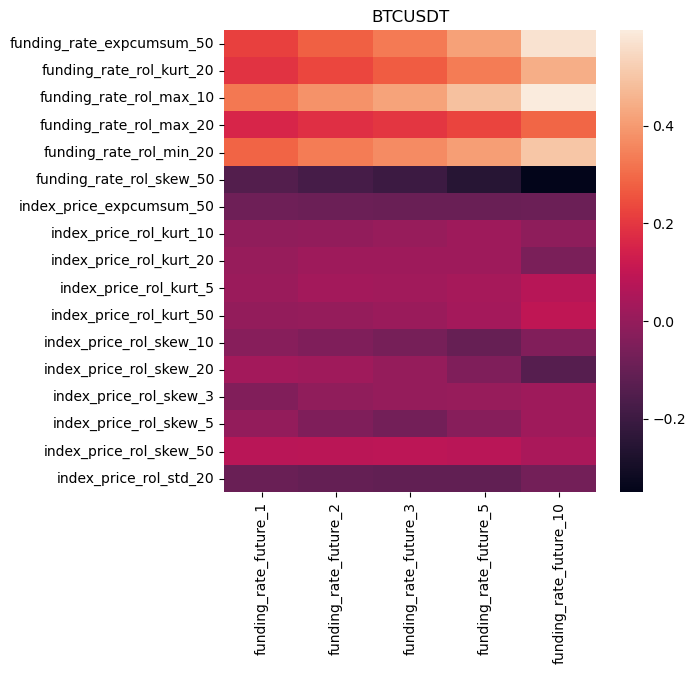

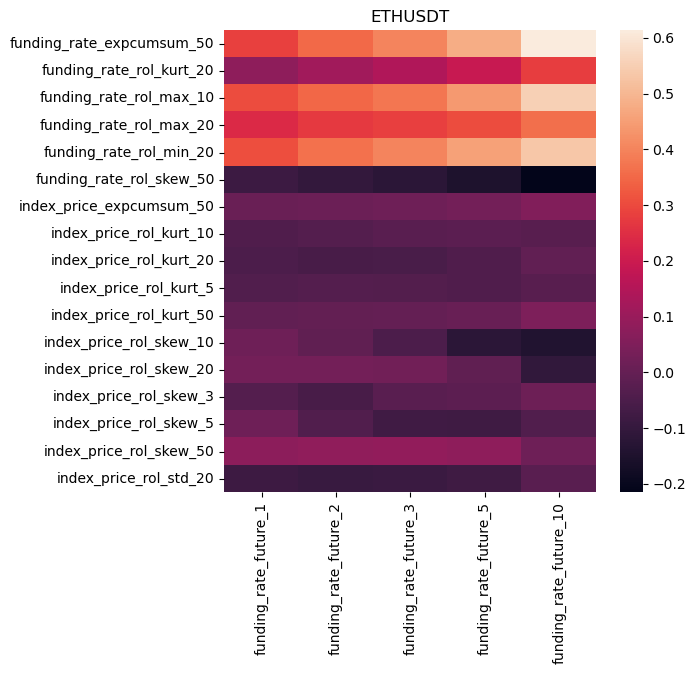

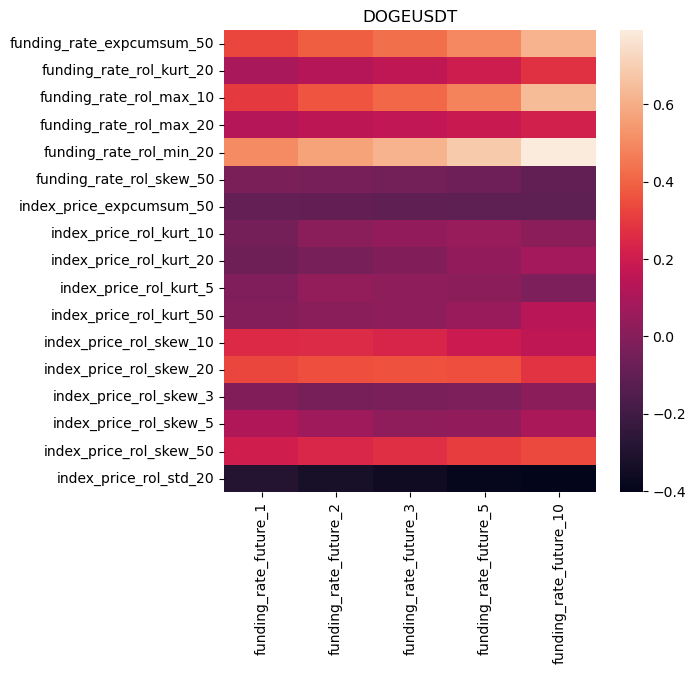

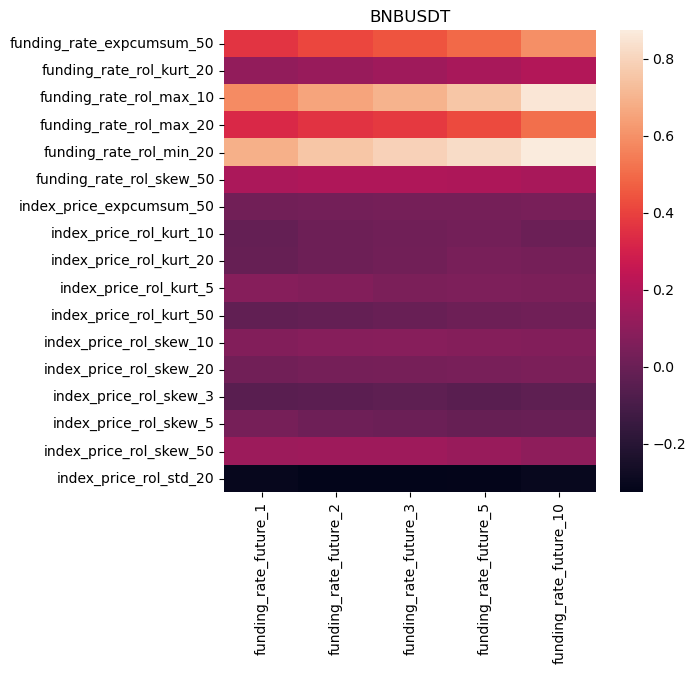

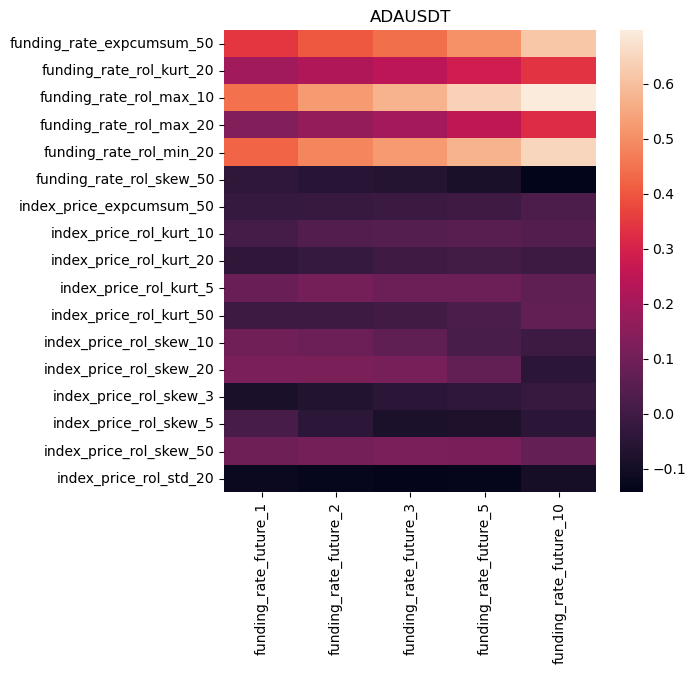

In [ ]:
for symbol in target_symbols:
    df_x_sc = df_x_sc_dict[symbol]
    df_y = df_y_dict[symbol]
    fig, ax = plt.subplots(figsize=(6, 6))
    cur_corr = pd.concat([df_x_sc, df_y], axis=1).corr().iloc[:-5, -5:]
    sns.heatmap(cur_corr, ax=ax)
    ax.set_title(symbol)


In [ ]:
train_end_date = datetime.datetime(2022, 7, 1)
train_idx_dict = {}
for symbol in target_symbols:
    df = pd.read_feather(data_dir / f"{symbol}.feather")
    train_idx = pd.to_datetime(df["funding_timestamp"], unit="us") < train_end_date
    train_idx_dict[symbol] = train_idx


## Single Variable

In [ ]:
from artool.toy.toy_simu import get_pnl_simple

buy_thre_list = np.linspace(-2, 2, 21)
sell_thre_list = np.linspace(-2, 2, 21)


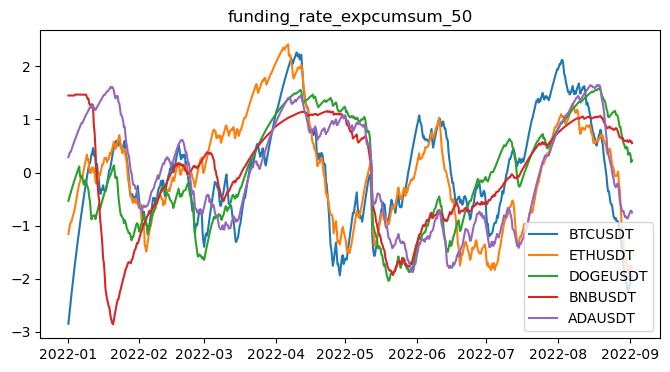

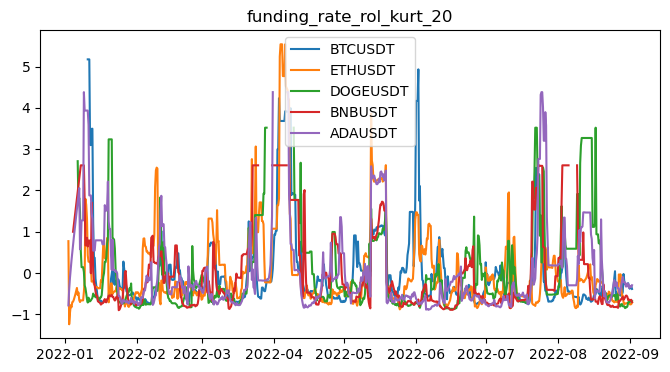

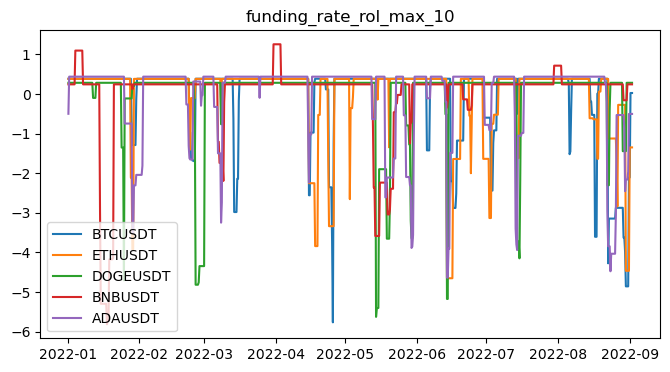

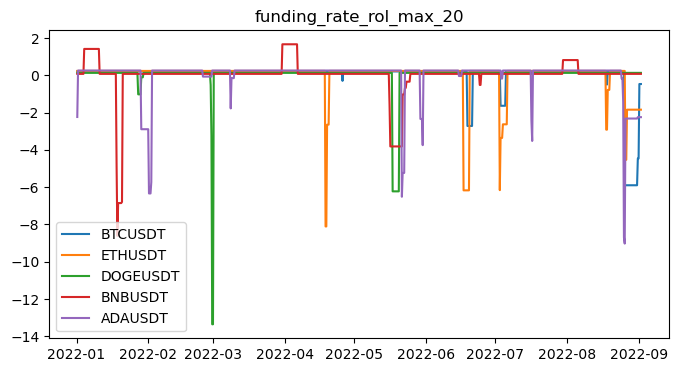

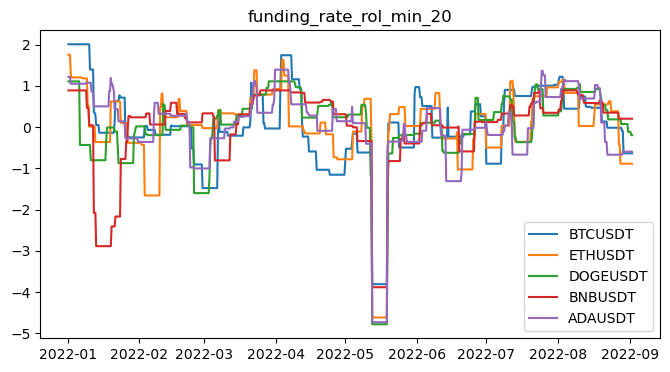

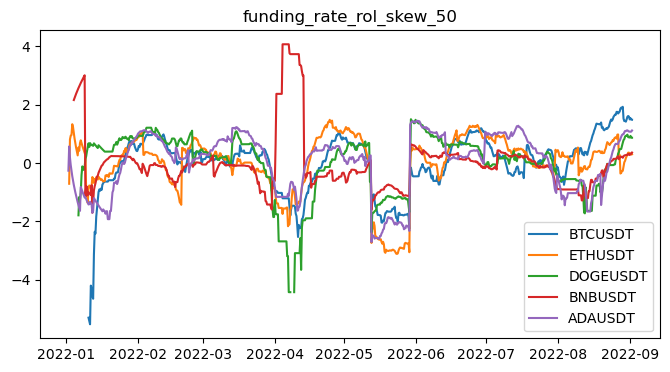

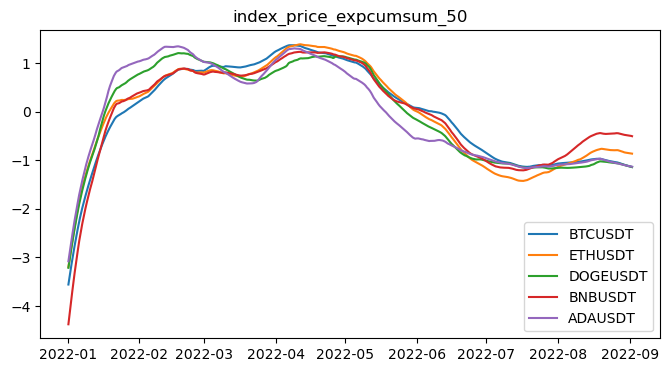

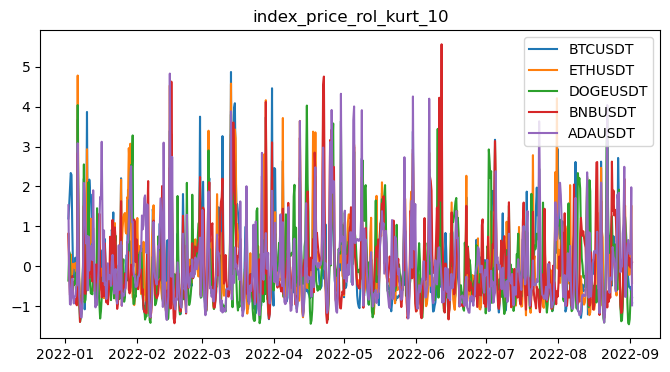

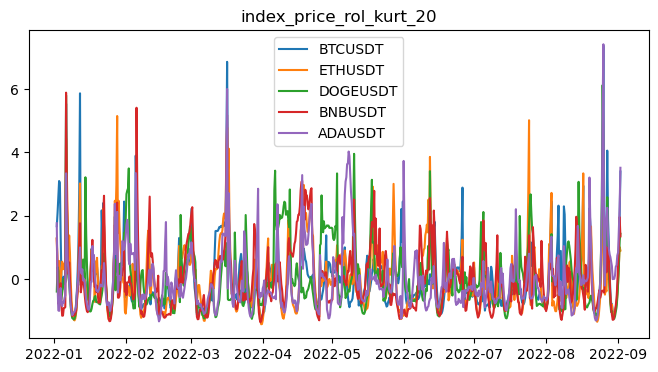

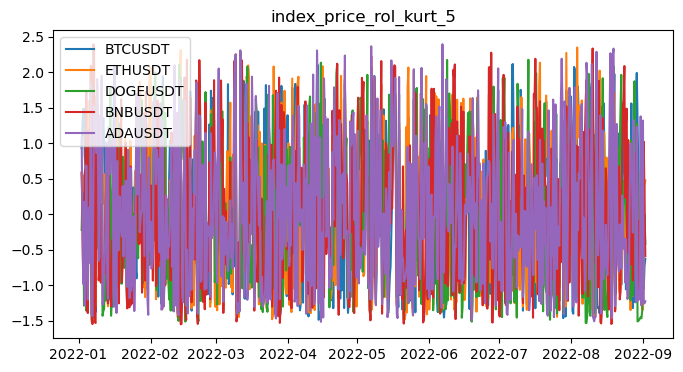

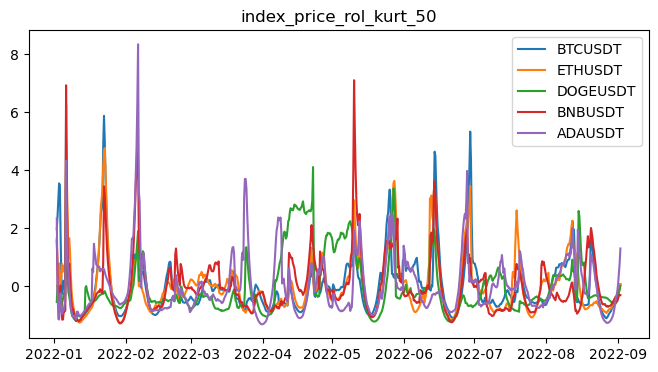

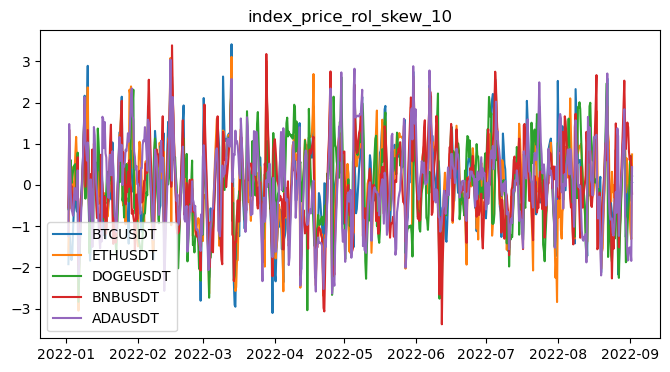

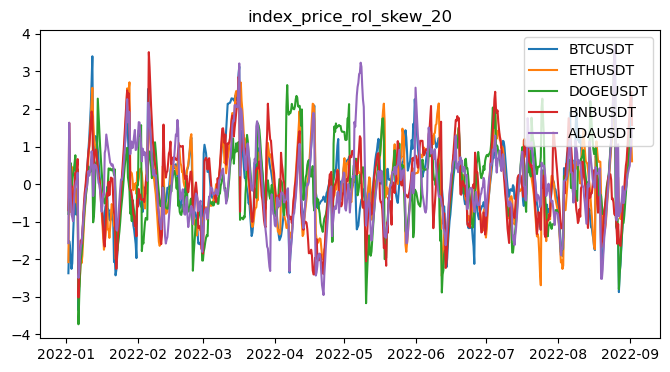

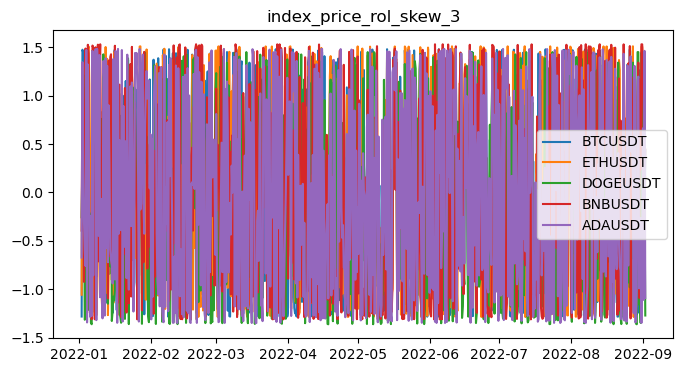

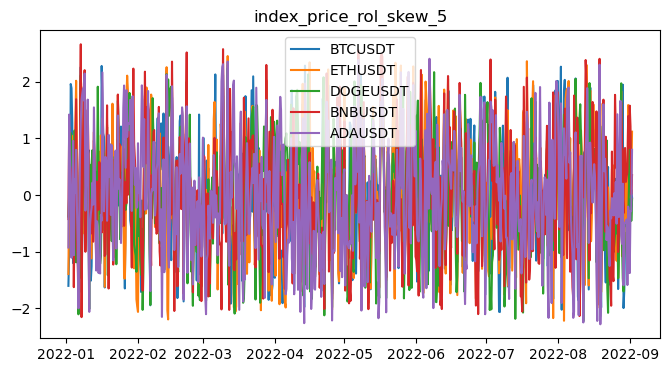

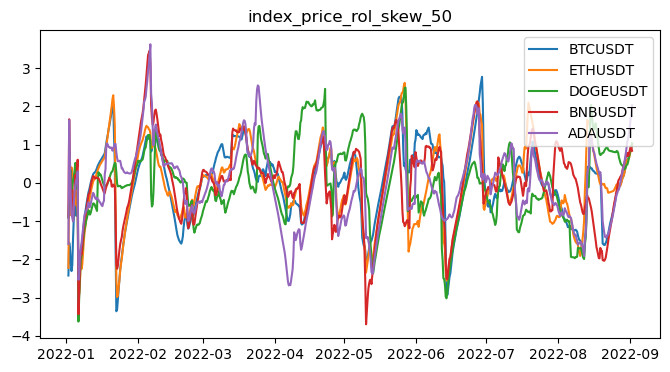

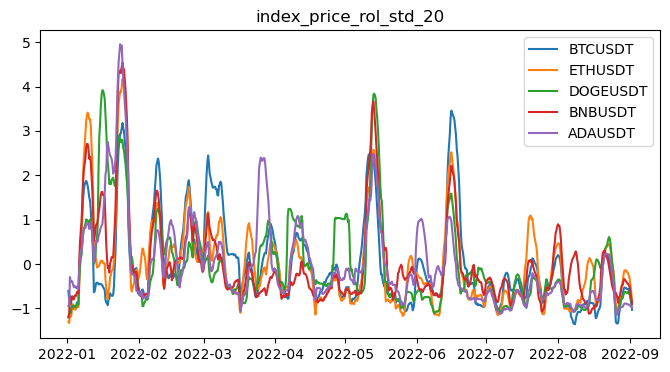

In [ ]:
# Plot variables
for x_name in x_selected:
    fig, ax = plt.subplots(figsize=(8, 4))
    for symbol in target_symbols:
        val = df_x_sc_dict[symbol][x_name]
        t = pd.to_datetime(df["funding_timestamp"], unit="us")
        ax.plot(t, val, label=symbol)
    ax.legend()
    ax.set_title(x_name)


## Trade individually

In [ ]:
buy_thre_list = np.linspace(-2, 2, 21)
sell_thre_list = np.linspace(-2, 2, 21)

fig_dir = Path("./toy_model_2/figures/single_x")
fig_dir.mkdir(exist_ok=True, parents=True)
corr_dir = fig_dir / "corr"
corr_dir.mkdir(exist_ok=True, parents=True)
scan_dir = fig_dir / "pnl_scan"
scan_dir.mkdir(exist_ok=True, parents=True)

for symbol in target_symbols:
    print(f"Processing {symbol}")
    df_symb = df_x_sc_dict[symbol]
    train_idx = train_idx_dict[symbol]

    funding_rate = pd.read_feather(data_dir / f"{symbol}.feather")["funding_rate"]
    fr_train = funding_rate[train_idx]
    fr_test = funding_rate[~train_idx]

    pnl_test_opt_list = []
    for x_name in x_selected:
        x = df_symb[x_name].fillna(0).values
        x_train = x[train_idx]
        x_test = x[~train_idx]


        # plot x vs y
        y = df_y_sc_dict[symbol]["funding_rate_future_5"].fillna(0).values
        y_train = y[train_idx]
        y_test = y[~train_idx]

        fig, ax = plt.subplots(ncols=2, figsize=(12, 5))
        ax[0].scatter(y_train, x_train, label="train")
        #r2_train = r2_score(y_train, x_train)
        #ax[0].set_title(f"train, r2: {r2_train:.3f}")
        corr_train = np.corrcoef(y_train, x_train)[0, 1]
        ax[0].set_title(f"train, corr: {corr_train:.3f}")
        ax[0].set_xlabel("funding_rate_future_5")
        ax[0].set_ylabel(x_name)

        ax[1].scatter(y_test, x_test, label="test")
        #r2_test = r2_score(y_test, x_test)
        #ax[1].set_title(f"test, r2: {r2_test:.3f}")
        corr_test = np.corrcoef(y_test, x_test)[0, 1]
        ax[1].set_title(f"test, corr: {corr_test:.3f}")
        ax[1].set_xlabel("funding_rate_future_5")
        ax[1].set_ylabel(x_name)

        # save to corr_dir
        fig.savefig(corr_dir / f"{symbol}_{x_name}.png")
        plt.close(fig)

        #continue
        #plt.show()
        #break


        pnl_list_train = [[0] * 21 for _ in range(21)]
        pnl_list_test = [[0] * 21 for _ in range(21)]
        for i, buy_thre in enumerate(buy_thre_list):
            for j, sell_thre in enumerate(sell_thre_list):
                pnl_list_train[i][j] = get_pnl_simple(
                    x_train, fr_train, buy_thre, sell_thre
                )
                pnl_list_test[i][j] = (
                    get_pnl_simple(x_test, fr_test, buy_thre, sell_thre) * 3
                )

        # find location of max pnl in train
        max_i, max_j = np.unravel_index(np.argmax(pnl_list_train), (21, 21))
        max_pnl_train = pnl_list_train[max_i][max_j]
        pnl_test_opt = pnl_list_test[max_i][max_j]
        # print(f"{x_name}, max_pnl in test: {pnl_test_opt}")
        pnl_test_opt_list.append(pnl_test_opt)

        # plot pnl scan
        fig, ax = plt.subplots(ncols=2, figsize=(12, 5))
        sns.heatmap(pnl_list_train, ax=ax[0])
        sns.heatmap(pnl_list_test, ax=ax[1])
        ax[0].set_title("train")
        ax[0].set_xlabel("buy_thre")
        ax[0].set_ylabel("sell_thre")
        ax[1].set_title("test x3")
        ax[1].set_xlabel("buy_thre")
        ax[1].set_ylabel("sell_thre")
        fig.suptitle(f"{symbol} {x_name}")

        # save figure
        fig.savefig(scan_dir / f"{symbol}_{x_name}.png")
        plt.close(fig)

    print(f"max_pnl in test: {max(pnl_test_opt_list)}")
    #break


Processing BTCUSDT
max_pnl in test: 0.02299011
Processing ETHUSDT
max_pnl in test: 0.011218139999999998
Processing DOGEUSDT
max_pnl in test: 0.029322209999999998
Processing BNBUSDT
max_pnl in test: 0.0
Processing ADAUSDT
max_pnl in test: 0.018088470000000002


## Linear Model

In [129]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [215]:
# thresould for scaled y
buy_thre_list = np.linspace(-2, 2, 21)
sell_thre_list = np.linspace(-2, 2, 21)

fig_dir = Path("./toy_model_2/figures/linear")
fig_dir.mkdir(exist_ok=True, parents=True)
corr_dir = fig_dir / "corr"
corr_dir.mkdir(exist_ok=True, parents=True)
scan_dir = fig_dir / "pnl_scan"
scan_dir.mkdir(exist_ok=True, parents=True)

for symbol in target_symbols:
    print(f"Processing {symbol}")
    train_idx = train_idx_dict[symbol]
    funding_rate = pd.read_feather(data_dir / f"{symbol}.feather")["funding_rate"]
    fr_train = funding_rate[train_idx]
    fr_test = funding_rate[~train_idx]

    x = df_x_sc_dict[symbol][x_selected].fillna(0).values
    x_train = x[train_idx]
    x_test = x[~train_idx]
    y = df_y_sc_dict[symbol]["funding_rate_future_5"].fillna(0).values
    y_train = y[train_idx]
    y_test = y[~train_idx]

    # linear regression
    model = LinearRegression()
    model.fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    # plot y_pred vs y
    fig, ax = plt.subplots(ncols=2, figsize=(12, 5))
    ax[0].scatter(y_train, y_pred_train, label="train")
    r2_train = r2_score(y_train, y_pred_train)
    ax[0].set_title(f"train, r2: {r2_train:.3f}")
    ax[0].set_xlabel("funding_rate_future_5")
    ax[0].set_ylabel("y_pred")

    ax[1].scatter(y_test, y_pred_test, label="test")
    r2_test = r2_score(y_test, y_pred_test)
    ax[1].set_title(f"test, r2: {r2_test:.3f}")
    ax[1].set_xlabel("funding_rate_future_5")
    ax[1].set_ylabel("y_pred")
    
    fig.savefig(corr_dir / f"{symbol}_linear.png")
    plt.close(fig)
    
    # plt.show()
    # break

    # find optimal pnl
    pnl_list_train = [[0] * 21 for _ in range(21)]
    pnl_list_test = [[0] * 21 for _ in range(21)]
    for i, buy_thre in enumerate(buy_thre_list):
        for j, sell_thre in enumerate(sell_thre_list):
            pnl_list_train[i][j] = get_pnl_simple(
                y_pred_train, fr_train, buy_thre, sell_thre
            )
            pnl_list_test[i][j] = (
                get_pnl_simple(y_pred_test, fr_test, buy_thre, sell_thre) * 3
            )

    fig, ax = plt.subplots(ncols=2, figsize=(12, 5))
    sns.heatmap(pnl_list_train, ax=ax[0])
    sns.heatmap(pnl_list_test, ax=ax[1])
    ax[0].set_title("train")
    ax[0].set_xlabel("buy_thre")
    ax[0].set_ylabel("sell_thre")
    ax[1].set_title("test x3")
    ax[1].set_xlabel("buy_thre")
    ax[1].set_ylabel("sell_thre")
    fig.suptitle(f"{symbol} {x_name}")
    
    fig.savefig(scan_dir / f"{symbol}_linear.png")
    plt.close(fig)

    #plt.show()
    #break

    # find location of max pnl in train
    max_i, max_j = np.unravel_index(np.argmax(pnl_list_train), (21, 21))
    max_pnl_train = pnl_list_train[max_i][max_j]
    pnl_test_opt = pnl_list_test[max_i][max_j]
    print(f"max_pnl in test: {pnl_test_opt}")


Processing BTCUSDT
max_pnl in test: 0.02106948
Processing ETHUSDT
max_pnl in test: 0.010310340000000001
Processing DOGEUSDT
max_pnl in test: 0.026883150000000005
Processing BNBUSDT
max_pnl in test: 0.0
Processing ADAUSDT
max_pnl in test: 0.01420824


## SVR

In [223]:
from sklearn.svm import SVR

# thresould for scaled y
buy_thre_list = np.linspace(-2, 2, 21)
sell_thre_list = np.linspace(-2, 2, 21)

fig_dir = Path("./toy_model_2/figures/svr")
fig_dir.mkdir(exist_ok=True, parents=True)
corr_dir = fig_dir / "corr"
corr_dir.mkdir(exist_ok=True, parents=True)
scan_dir = fig_dir / "pnl_scan"
scan_dir.mkdir(exist_ok=True, parents=True)

C_values = [0.05, 0.05, 0.05, 0.05, 0.1]
for sym_id, symbol in enumerate(target_symbols):
    print(f"Processing {symbol}")
    train_idx = train_idx_dict[symbol]
    funding_rate = pd.read_feather(data_dir / f"{symbol}.feather")["funding_rate"]
    fr_train = funding_rate[train_idx]
    fr_test = funding_rate[~train_idx]

    x = df_x_sc_dict[symbol][x_selected].fillna(0).values
    x_train = x[train_idx]
    x_test = x[~train_idx]
    y = df_y_sc_dict[symbol]["funding_rate_future_5"].fillna(0).values
    y_train = y[train_idx]
    y_test = y[~train_idx]

    # svr regression
    model = SVR(kernel="rbf", C=C_values[sym_id])
    model.fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    # plot y_pred vs y
    fig, ax = plt.subplots(ncols=2, figsize=(12, 5))
    ax[0].scatter(y_train, y_pred_train, label="train")
    r2_train = r2_score(y_train, y_pred_train)
    ax[0].set_title(f"train, r2: {r2_train:.3f}")
    ax[0].set_xlabel("funding_rate_future_5")
    ax[0].set_ylabel("y_pred")

    ax[1].scatter(y_test, y_pred_test, label="test")
    r2_test = r2_score(y_test, y_pred_test)
    ax[1].set_title(f"test, r2: {r2_test:.3f}")
    ax[1].set_xlabel("funding_rate_future_5")
    ax[1].set_ylabel("y_pred")
    
    fig.savefig(corr_dir / f"{symbol}_svr.png")
    plt.close(fig)
    
    #plt.show()
    #break

    # find optimal pnl
    pnl_list_train = [[0] * 21 for _ in range(21)]
    pnl_list_test = [[0] * 21 for _ in range(21)]
    for i, buy_thre in enumerate(buy_thre_list):
        for j, sell_thre in enumerate(sell_thre_list):
            pnl_list_train[i][j] = get_pnl_simple(
                y_pred_train, fr_train, buy_thre, sell_thre
            )
            pnl_list_test[i][j] = (
                get_pnl_simple(y_pred_test, fr_test, buy_thre, sell_thre) * 3
            )

    fig, ax = plt.subplots(ncols=2, figsize=(12, 5))
    sns.heatmap(pnl_list_train, ax=ax[0])
    sns.heatmap(pnl_list_test, ax=ax[1])
    ax[0].set_title("train")
    ax[0].set_xlabel("buy_thre")
    ax[0].set_ylabel("sell_thre")
    ax[1].set_title("test x3")
    ax[1].set_xlabel("buy_thre")
    ax[1].set_ylabel("sell_thre")
    fig.suptitle(f"{symbol} {x_name}")
    fig.savefig(scan_dir / f"{symbol}_svr.png")
    plt.close(fig)

    #plt.show()

    # find location of max pnl in train
    max_i, max_j = np.unravel_index(np.argmax(pnl_list_train), (21, 21))
    max_pnl_train = pnl_list_train[max_i][max_j]
    pnl_test_opt = pnl_list_test[max_i][max_j]
    print(f"max_pnl in test: {pnl_test_opt}")
    
    #break


Processing BTCUSDT
max_pnl in test: 0.02299011
Processing ETHUSDT
max_pnl in test: 0.011218139999999998
Processing DOGEUSDT
max_pnl in test: 0.02483664
Processing BNBUSDT
max_pnl in test: 0.0
Processing ADAUSDT
max_pnl in test: 0.015708240000000002


## Decision Tree

Processing BTCUSDT


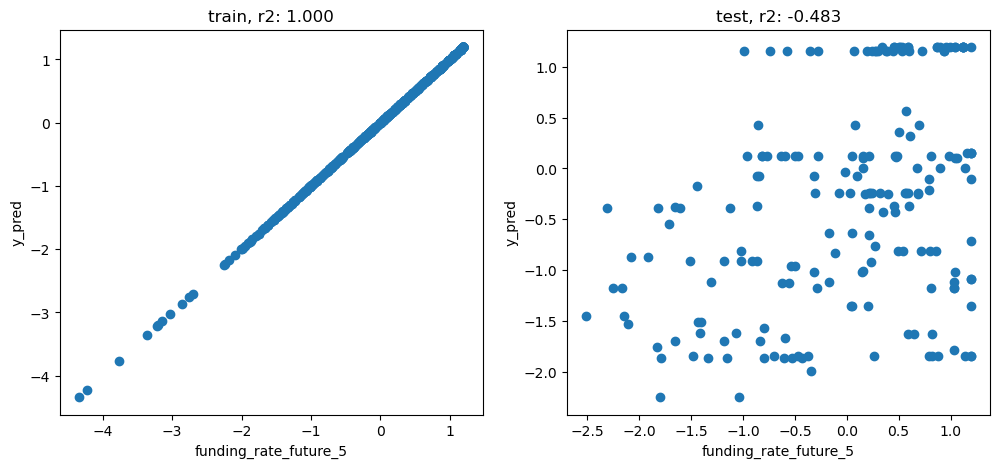

In [224]:
from sklearn.tree import ElasticNetCV

# thresould for scaled y
buy_thre_list = np.linspace(-2, 2, 21)
sell_thre_list = np.linspace(-2, 2, 21)

fig_dir = Path("./toy_model_2/figures/elastic_net")
fig_dir.mkdir(exist_ok=True, parents=True)
corr_dir = fig_dir / "corr"
corr_dir.mkdir(exist_ok=True, parents=True)
scan_dir = fig_dir / "pnl_scan"
scan_dir.mkdir(exist_ok=True, parents=True)

for sym_id, symbol in enumerate(target_symbols):
    print(f"Processing {symbol}")
    train_idx = train_idx_dict[symbol]
    funding_rate = pd.read_feather(data_dir / f"{symbol}.feather")["funding_rate"]
    fr_train = funding_rate[train_idx]
    fr_test = funding_rate[~train_idx]

    x = df_x_sc_dict[symbol][x_selected].fillna(0).values
    x_train = x[train_idx]
    x_test = x[~train_idx]
    y = df_y_sc_dict[symbol]["funding_rate_future_5"].fillna(0).values
    y_train = y[train_idx]
    y_test = y[~train_idx]

    # elastic_net regression
    model = DecisionTreeRegressor(random_state=rdm_seed)
    model.fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    # plot y_pred vs y
    fig, ax = plt.subplots(ncols=2, figsize=(12, 5))
    ax[0].scatter(y_train, y_pred_train, label="train")
    r2_train = r2_score(y_train, y_pred_train)
    ax[0].set_title(f"train, r2: {r2_train:.3f}")
    ax[0].set_xlabel("funding_rate_future_5")
    ax[0].set_ylabel("y_pred")

    ax[1].scatter(y_test, y_pred_test, label="test")
    r2_test = r2_score(y_test, y_pred_test)
    ax[1].set_title(f"test, r2: {r2_test:.3f}")
    ax[1].set_xlabel("funding_rate_future_5")
    ax[1].set_ylabel("y_pred")
    
    #fig.savefig(corr_dir / f"{symbol}_elastic_net.png")
    #plt.close(fig)
    
    plt.show()
    break

    # find optimal pnl
    pnl_list_train = [[0] * 21 for _ in range(21)]
    pnl_list_test = [[0] * 21 for _ in range(21)]
    for i, buy_thre in enumerate(buy_thre_list):
        for j, sell_thre in enumerate(sell_thre_list):
            pnl_list_train[i][j] = get_pnl_simple(
                y_pred_train, fr_train, buy_thre, sell_thre
            )
            pnl_list_test[i][j] = (
                get_pnl_simple(y_pred_test, fr_test, buy_thre, sell_thre) * 3
            )

    fig, ax = plt.subplots(ncols=2, figsize=(12, 5))
    sns.heatmap(pnl_list_train, ax=ax[0])
    sns.heatmap(pnl_list_test, ax=ax[1])
    ax[0].set_title("train")
    ax[0].set_xlabel("buy_thre")
    ax[0].set_ylabel("sell_thre")
    ax[1].set_title("test x3")
    ax[1].set_xlabel("buy_thre")
    ax[1].set_ylabel("sell_thre")
    fig.suptitle(f"{symbol} {x_name}")
    fig.savefig(scan_dir / f"{symbol}_elastic_net.png")
    plt.close(fig)

    #plt.show()

    # find location of max pnl in train
    max_i, max_j = np.unravel_index(np.argmax(pnl_list_train), (21, 21))
    max_pnl_train = pnl_list_train[max_i][max_j]
    pnl_test_opt = pnl_list_test[max_i][max_j]
    print(f"max_pnl in test: {pnl_test_opt}")
    
    #break
